In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import master_ROCKE3D as mr
import os, glob

from matplotlib import gridspec, colorbar, colors
from matplotlib.cm import get_cmap
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset

In [2]:
def sorter(filename):
    """
    Get an item from the list (one-by-one) and return a score for that item.
    Sorts based on PXXX in the .nc filename which occurs at the 17th-21st index for the files I'm looking at
    """
    return filename[17:21]

In [3]:
insolation = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]

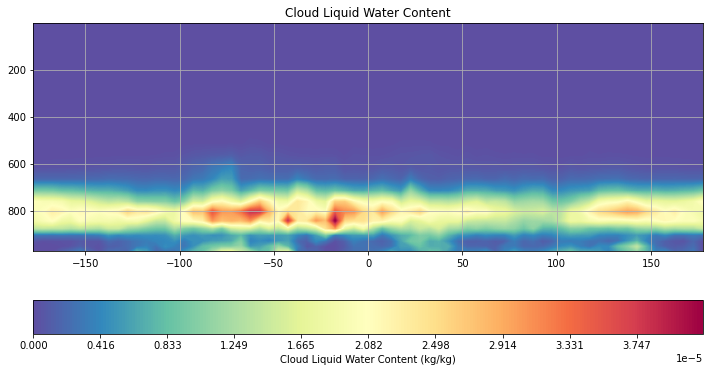

In [4]:
# Open data
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
filename = 'ANN0990-0999.aijlP211eoDOFP3Od_X064_O30.nc'
var = 'wtrcld'
data = Dataset(path + filename,'r')

# Import lat/lon coordinates and turn them into a meshgrid for plotting
plm = np.array(data['plm'])
lon = np.array(data['lon'])
lonGrid, plmGrid = np.meshgrid(lon, plm)

# Opens variable and converts it to an array
var1 = np.array(data[var])
var1 = np.average(var1,axis=1)

# Plotting
fig = plt.figure(figsize=(12,6))
ax = plt.axes()
ax.grid(True)
c1 = ax.contourf(lonGrid, plmGrid, var1, levels=np.linspace(np.min(var1), np.max(var1),1000), cmap='Spectral_r')
fig.colorbar(c1,label=(data[var].long_name +' ('+ data[var].units+')'), orientation="horizontal")
ax.set_title(data[var].long_name)
plt.gca().invert_yaxis()

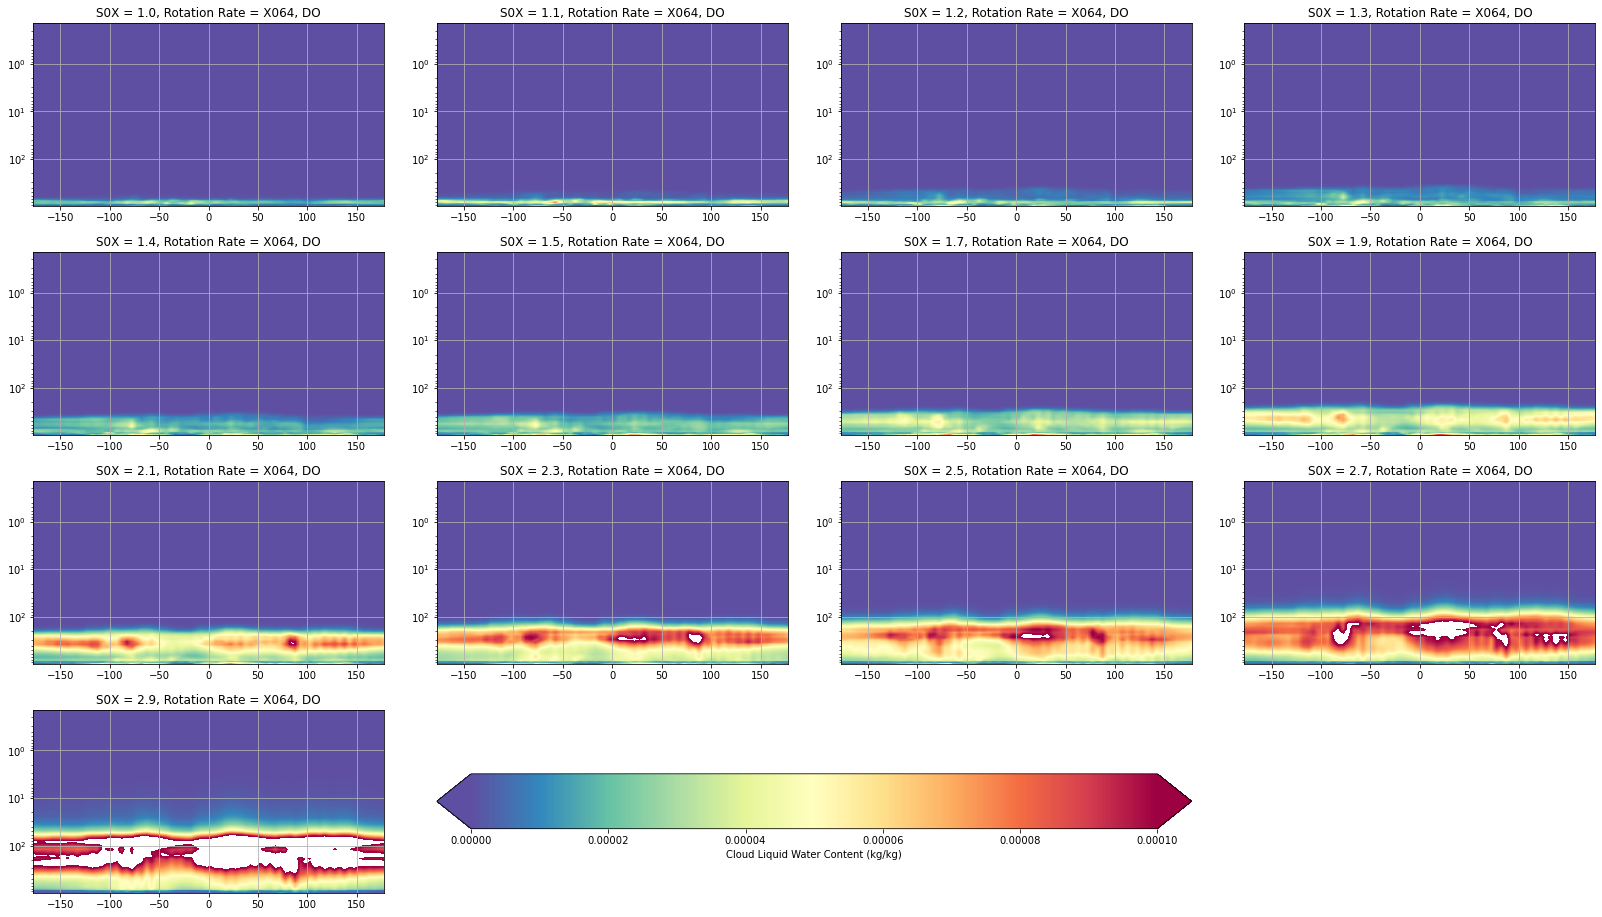

In [5]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.25, wspace=.15)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'wtrcld'

min_val = 0 # for contour levels and colorbar
max_val = 10*(10**-5)

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

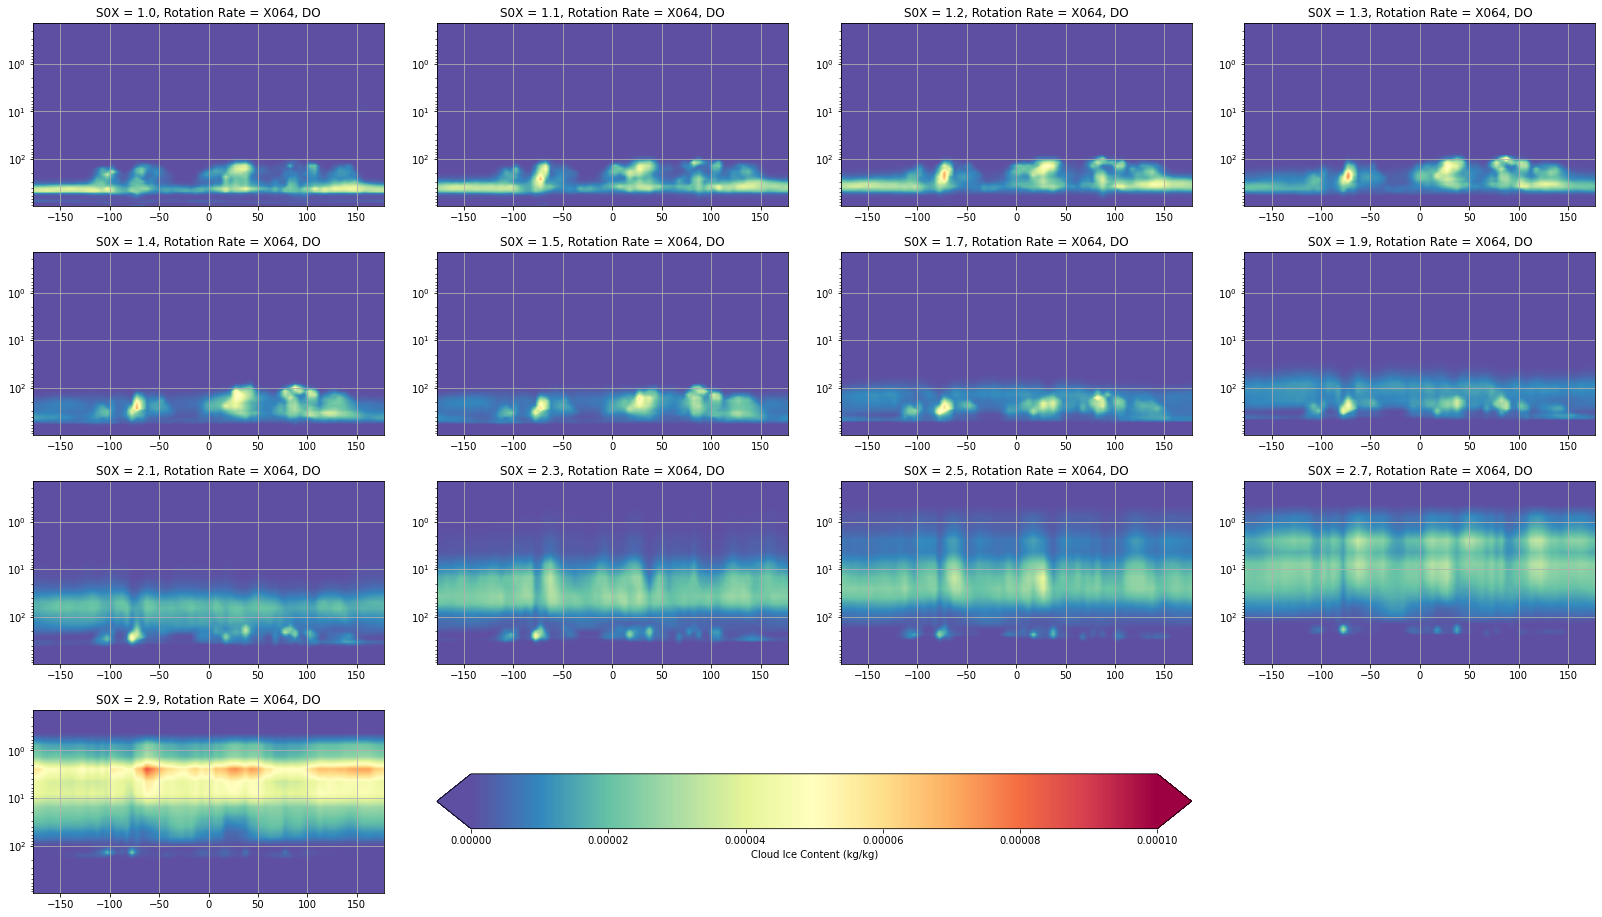

In [6]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.25, wspace=.15)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'icecld'

min_val = 0 # for contour levels and colorbar
max_val = 10*(10**-5)

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

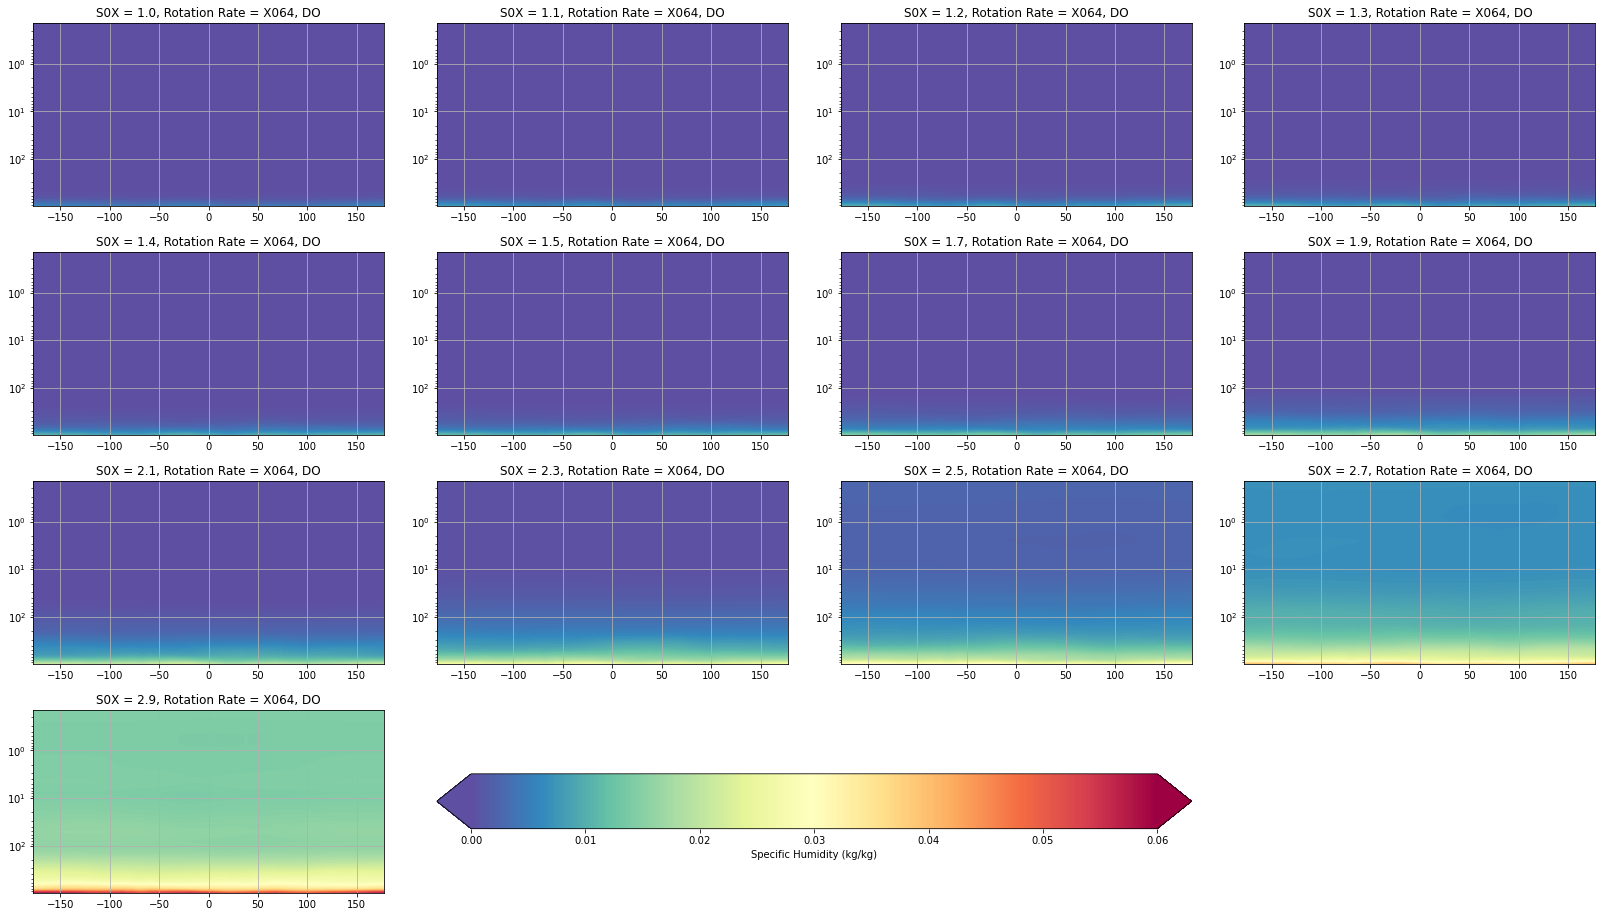

In [7]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.25, wspace=.15)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'SpHuL'

min_val = 0 # for contour levels and colorbar
max_val = 6*(10**-2)

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

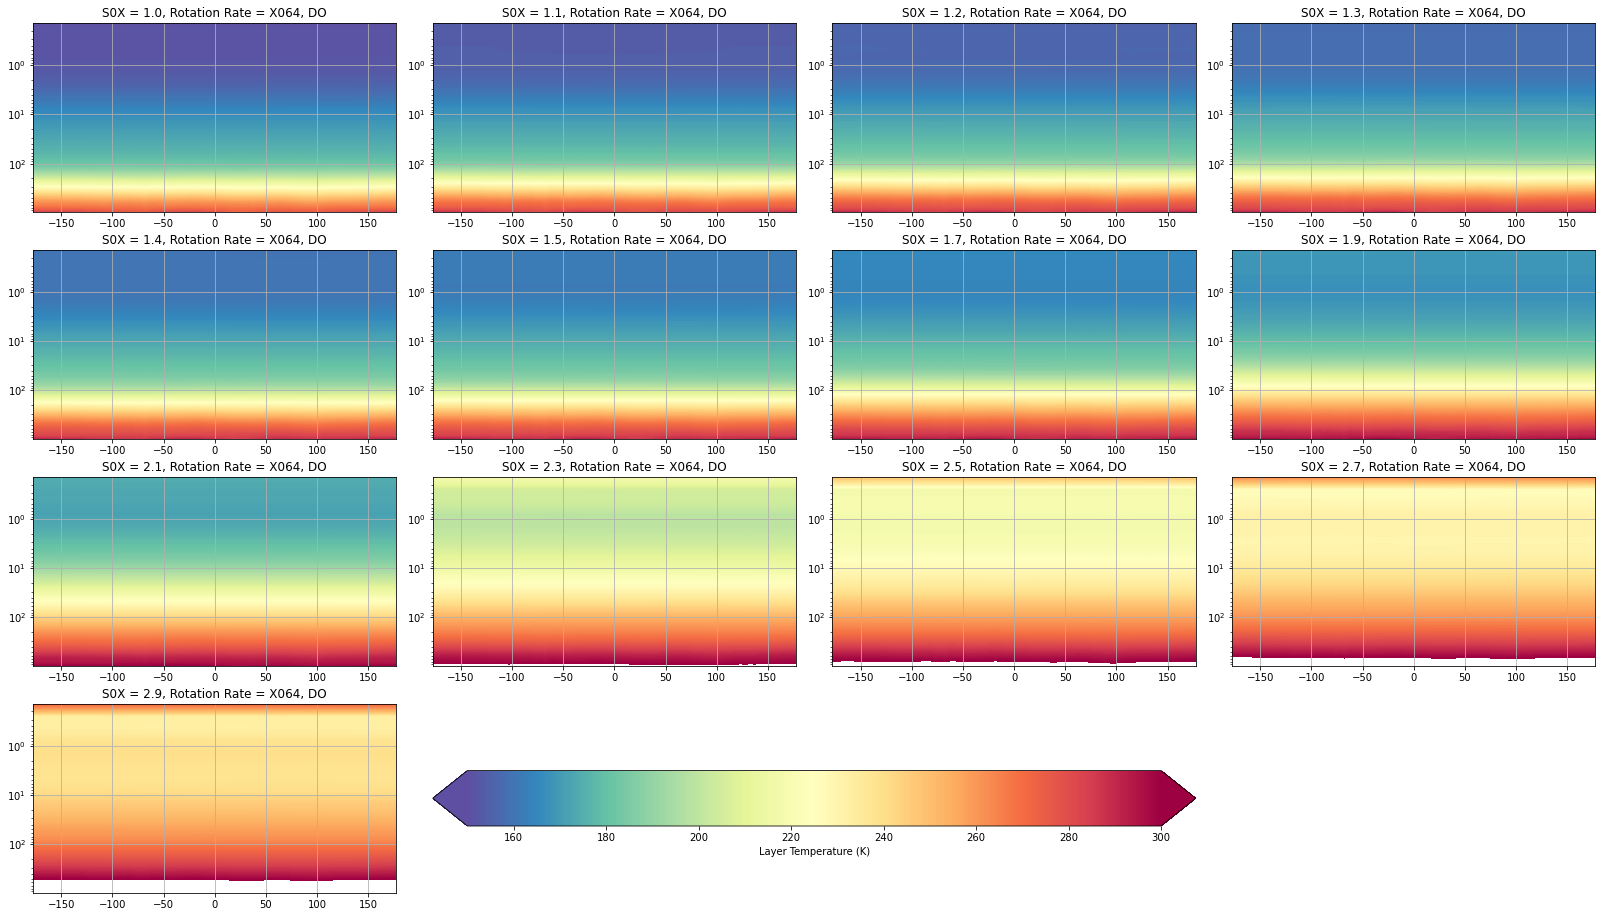

In [8]:
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.2, wspace=.1)
ax = []

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'TempL'

min_val = 150 # for contour levels and colorbar
max_val = 300

for i in range(len(files)):
    var1, lonGrid, plmGrid = mr.open_zonal_ROCKE3D(path, files[i], var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i]))
    ax[i].grid(True)
    ax[i].contourf(lonGrid, plmGrid, var1, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].set_yscale('log')
    plt.gca().invert_yaxis()
    
# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label(data[var].long_name +' ('+ data[var].units+')')

plt.show()

# Line plots

In [9]:
def open_zonal_line_ROCKE3D(path, filename, directory, var):
    """
    This function opens and creates zonally averaged ROCKE-3D netCDF files
    
    Inputs:
    path - directory where model outputs are kept e.g. 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
    filename - filename is str form, could also be a list of strings
    var - variable name in .nc file. note: this means you have to open the .nc file and figure out the variable name (e.g. 'tsurf')
    Outputs: 
    var1 - variable array
    lon - longitude array
    
    """
    
    # Open data
    data = Dataset(path + filename,'r')
    
    # Import lat/lon coordinates and turn them into a meshgrid for plotting
    lon = np.array(data['lon'])
    
    # Opens variable and converts it to an array
    var1 = np.array(data[var])
    if directory == 'AIJL':
        var1 = np.mean(var1,axis=1)
    elif directory == 'AIJK':
        var1 = np.mean(var1,axis=1)
    elif directory == 'AJL':
        pass
    var1 = np.mean(var1,axis=0)
#     var_error = np.std(var1)
    
    return var1, lon

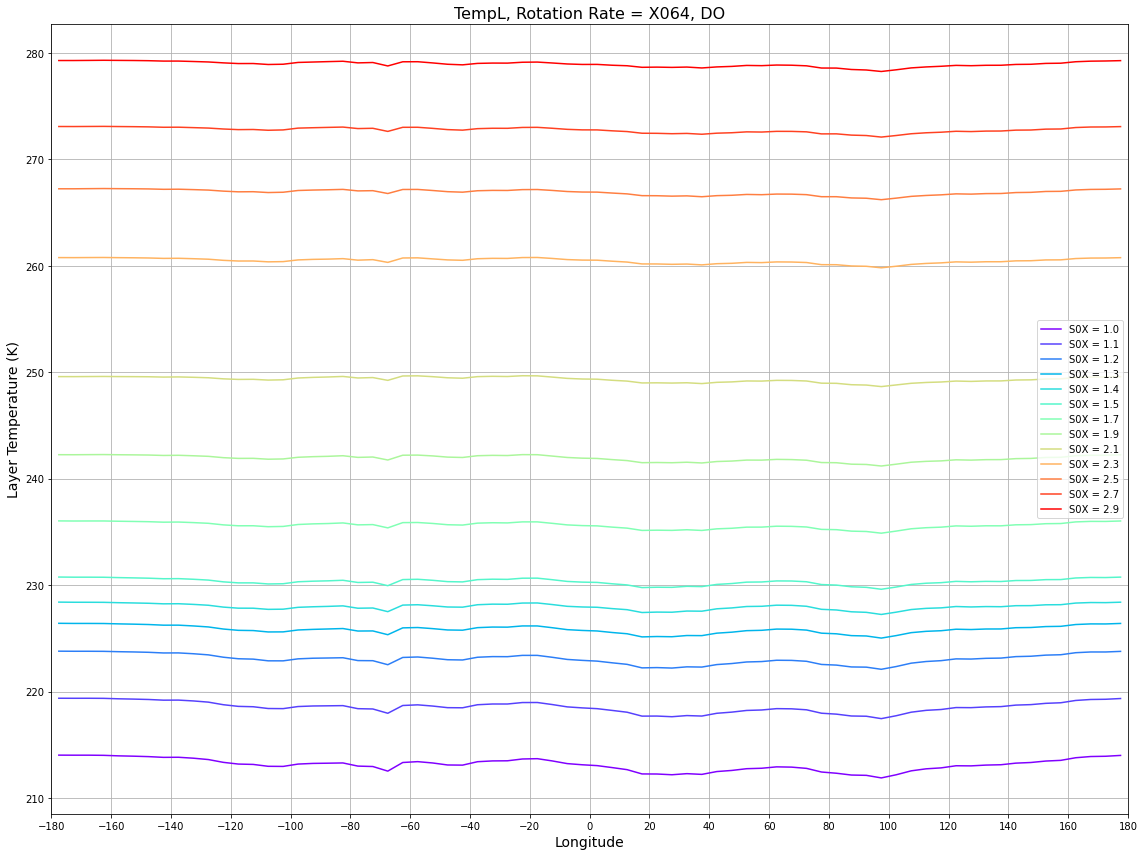

In [10]:
directory = 'AIJL'
rotation = 'X064'
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'TempL'

files = [os.path.basename(file) for file in glob.glob(directory+'/*'+rotation+'*.nc')]
files = sorted(files, key=sorter)
name = files[0]
data = Dataset(path + name,'r') # loading this to automatically population plot titles

fig, ax = plt.subplots(1, figsize=(16, 12))
ax.set_title(var + ', Rotation Rate = ' +rotation+', DO', size=16)
ax.set_xlabel('Longitude', size=14)
ax.set_ylabel(data[var].long_name+' ('+data[var].units+')', size=14)
ax.set_xlim(-180,180)
ax.set_xticks(np.arange(-180,200,20))
plt.grid()
colors = plt.cm.rainbow(np.linspace(0, 1, len(insolation)))

for i in range(len(files)):
    var1, lon = open_zonal_line_ROCKE3D(path, files[i], directory, var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
    plt.plot(lon, var1, label='S0X = '+ str(insolation[i]),color=colors[i])
    
plt.tight_layout()
plt.legend()
plt.show()

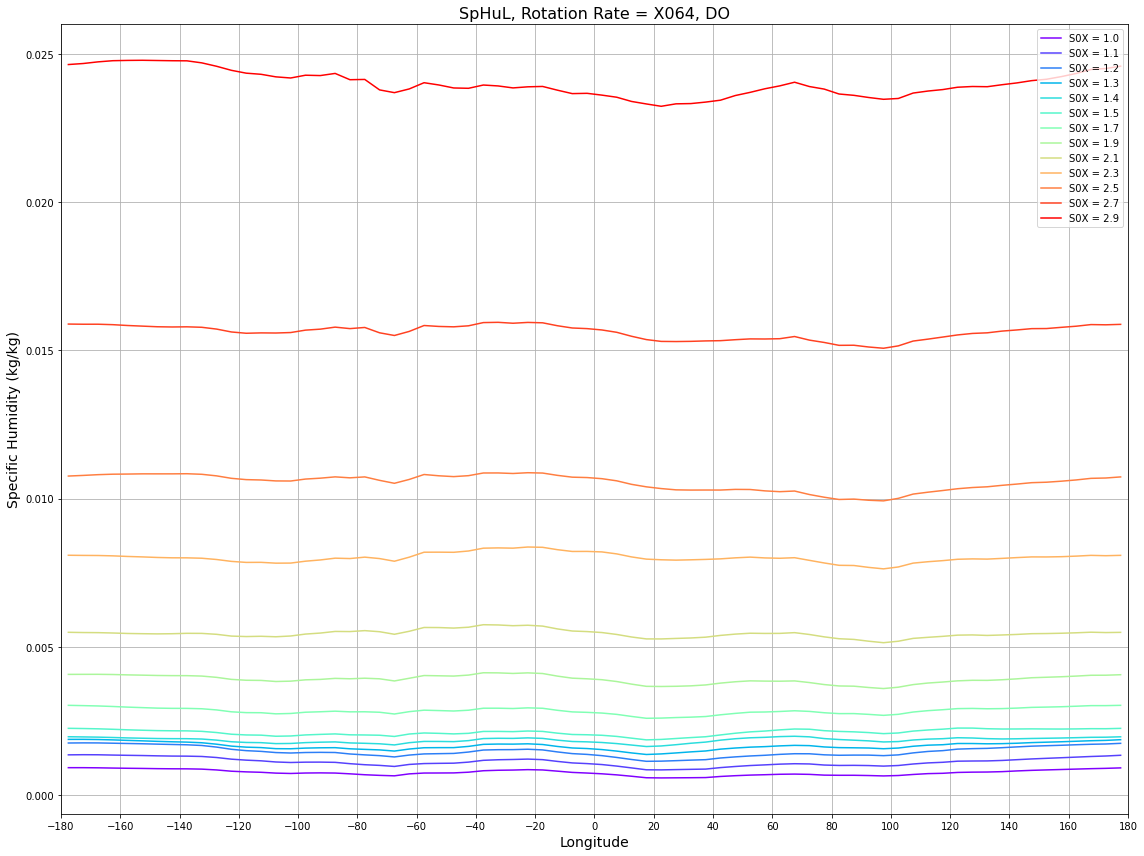

In [11]:
directory = 'AIJL'
rotation = 'X064'
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'SpHuL'

files = [os.path.basename(file) for file in glob.glob(directory+'/*'+rotation+'*.nc')]
files = sorted(files, key=sorter)
name = files[0]
data = Dataset(path + name,'r') # loading this to automatically population plot titles

fig, ax = plt.subplots(1, figsize=(16, 12))
ax.set_title(var + ', Rotation Rate = ' +rotation+', DO', size=16)
ax.set_xlabel('Longitude', size=14)
ax.set_ylabel(data[var].long_name+' ('+data[var].units+')', size=14)
ax.set_xlim(-180,180)
ax.set_xticks(np.arange(-180,200,20))
plt.grid()
colors = plt.cm.rainbow(np.linspace(0, 1, len(insolation)))

for i in range(len(files)):
    var1, lon = open_zonal_line_ROCKE3D(path, files[i], directory, var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
    plt.plot(lon, var1, label='S0X = '+ str(insolation[i]),color=colors[i])
    
plt.tight_layout()
plt.legend()
plt.show()

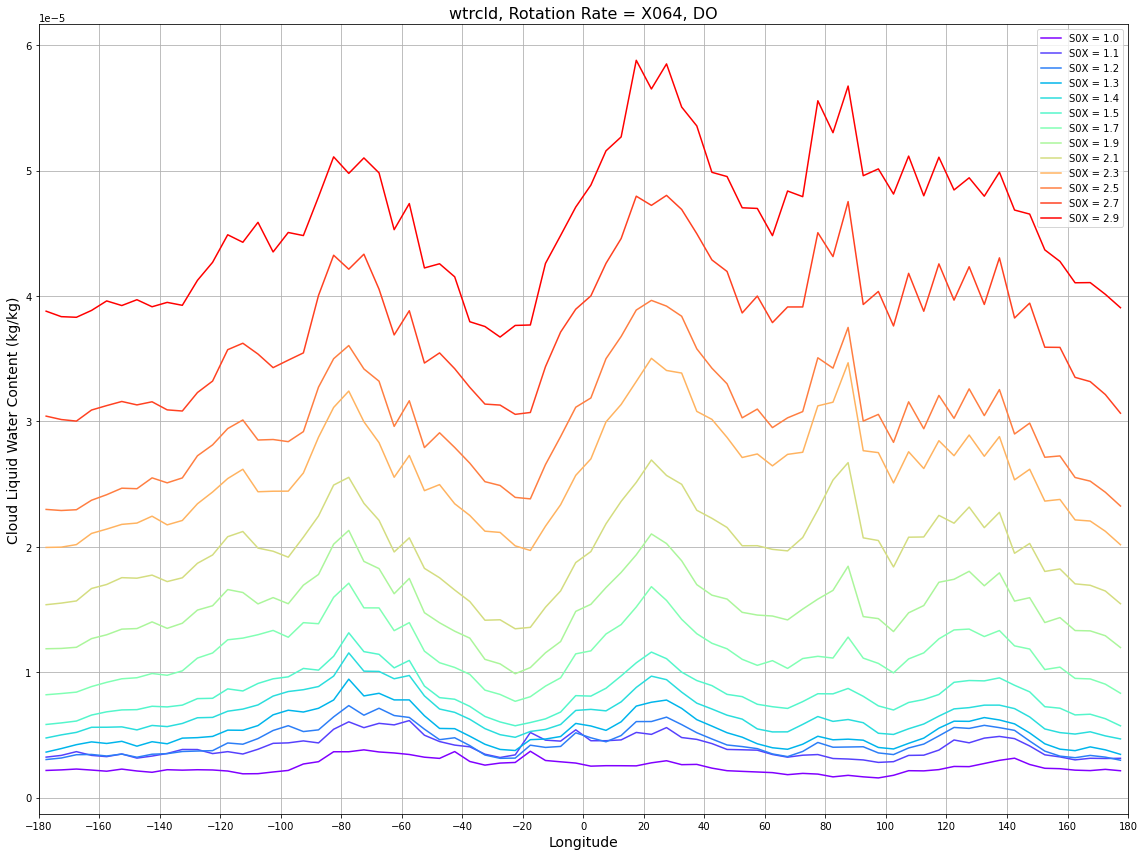

In [12]:
directory = 'AIJL'
rotation = 'X064'
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'wtrcld'

files = [os.path.basename(file) for file in glob.glob(directory+'/*'+rotation+'*.nc')]
files = sorted(files, key=sorter)
name = files[0]
data = Dataset(path + name,'r') # loading this to automatically population plot titles

fig, ax = plt.subplots(1, figsize=(16, 12))
ax.set_title(var + ', Rotation Rate = ' +rotation+', DO', size=16)
ax.set_xlabel('Longitude', size=14)
ax.set_ylabel(data[var].long_name+' ('+data[var].units+')', size=14)
ax.set_xlim(-180,180)
ax.set_xticks(np.arange(-180,200,20))
plt.grid()
colors = plt.cm.rainbow(np.linspace(0, 1, len(insolation)))

for i in range(len(files)):
    var1, lon = open_zonal_line_ROCKE3D(path, files[i], directory, var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
    plt.plot(lon, var1, label='S0X = '+ str(insolation[i]),color=colors[i])

plt.tight_layout()
plt.legend()
plt.show()

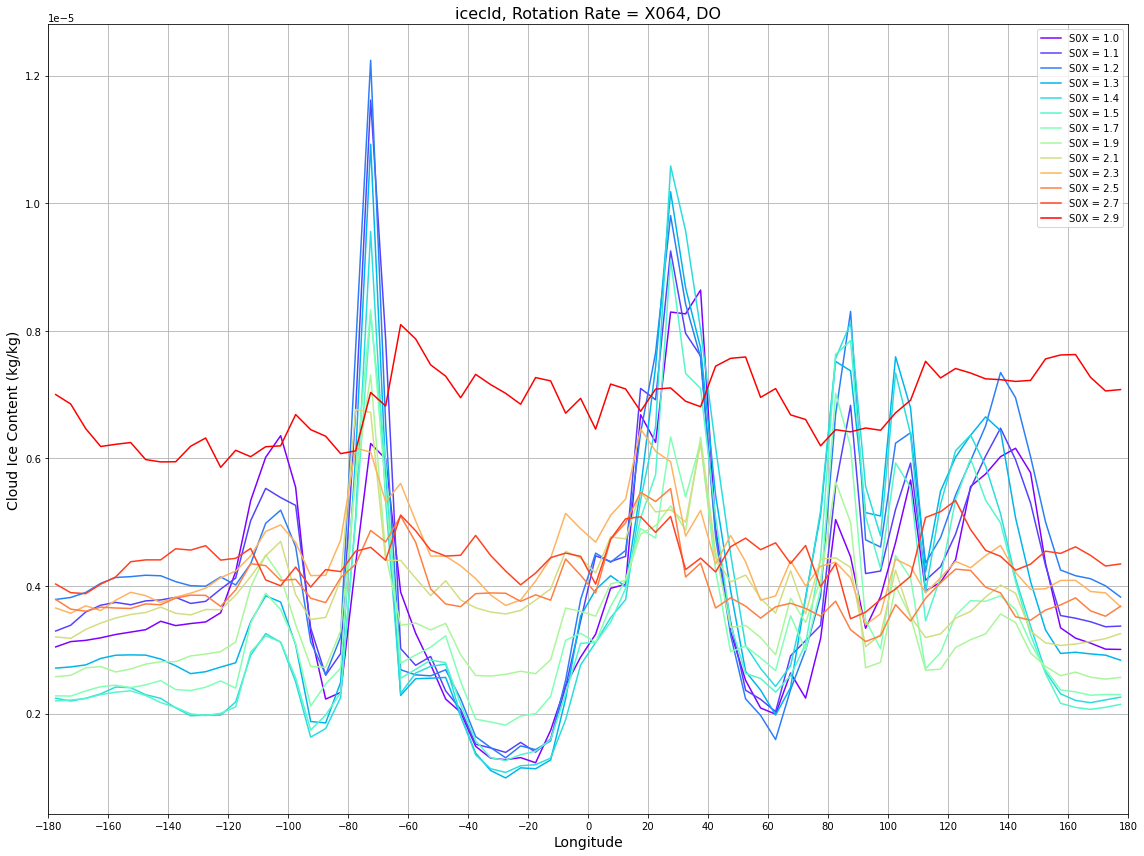

In [13]:
directory = 'AIJL'
rotation = 'X064'
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'icecld'

files = [os.path.basename(file) for file in glob.glob(directory+'/*'+rotation+'*.nc')]
files = sorted(files, key=sorter)
name = files[0]
data = Dataset(path + name,'r') # loading this to automatically population plot titles

fig, ax = plt.subplots(1, figsize=(16, 12))
ax.set_title(var + ', Rotation Rate = ' +rotation+', DO', size=16)
ax.set_xlabel('Longitude', size=14)
ax.set_ylabel(data[var].long_name+' ('+data[var].units+')', size=14)
ax.set_xlim(-180,180)
ax.set_xticks(np.arange(-180,200,20))
plt.grid()
colors = plt.cm.rainbow(np.linspace(0, 1, len(insolation)))

for i in range(len(files)):
    var1, lon = open_zonal_line_ROCKE3D(path, files[i], directory, var)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
    plt.plot(lon, var1, label='S0X = '+ str(insolation[i]),color=colors[i])
    
plt.tight_layout()
plt.legend()
plt.show()

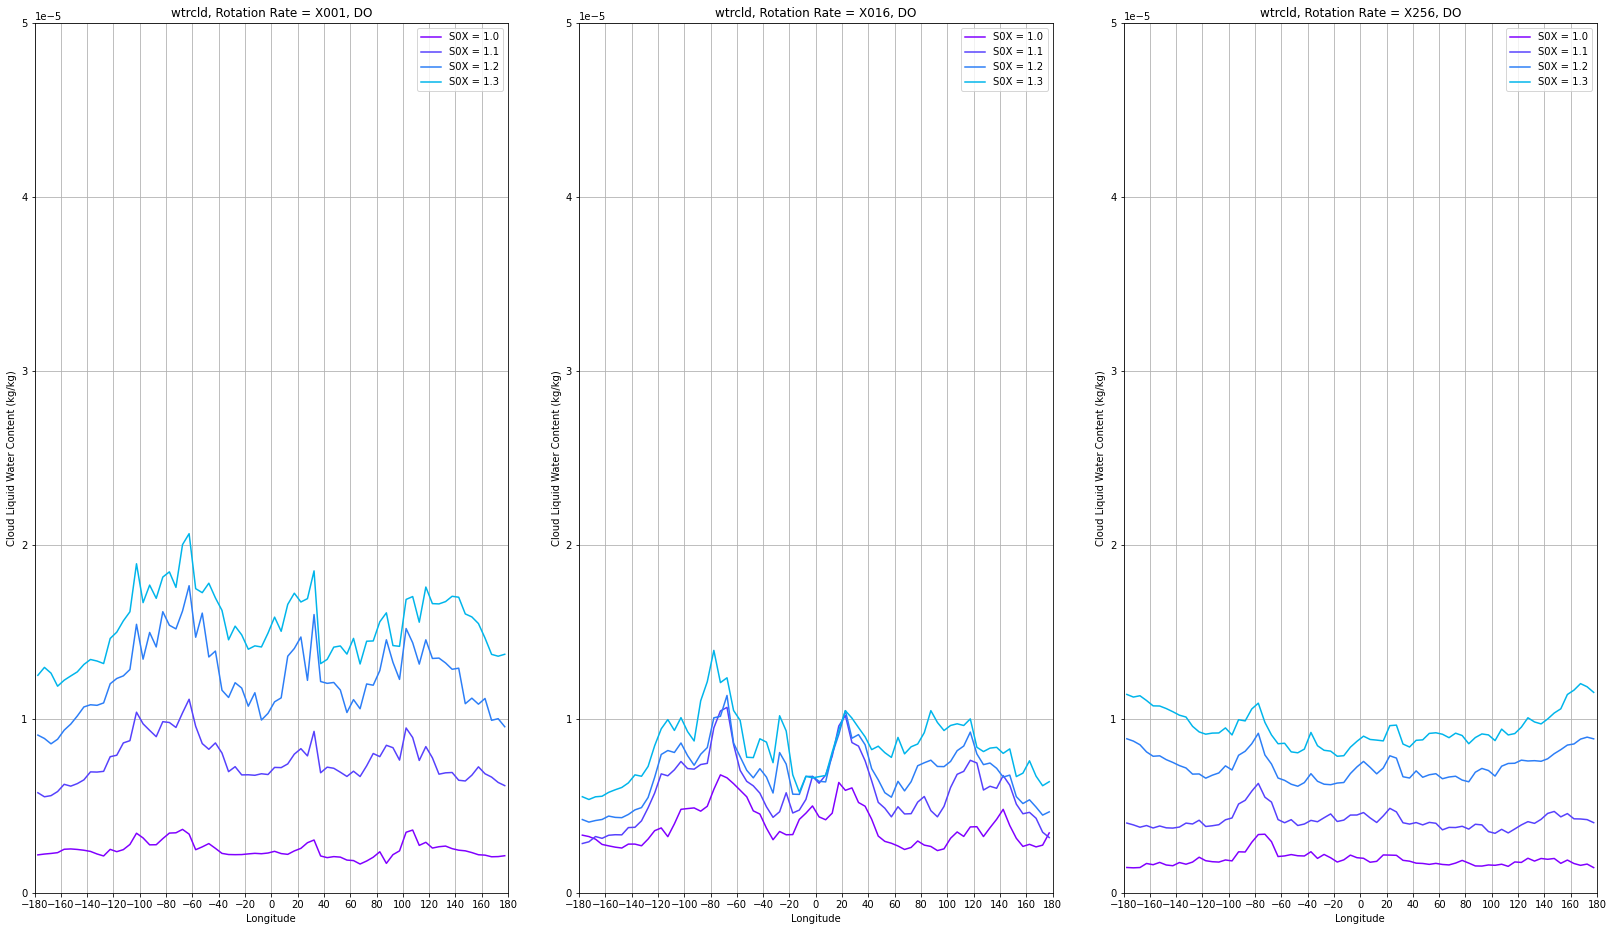

In [14]:
directory = 'AIJL'
rotation = ['X001', 'X016','X256']
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'wtrcld'


fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(1, 3)
gs.update(hspace=.25, wspace=.15)
ax = []

for i, rate in enumerate(rotation):
    files = [os.path.basename(file) for file in glob.glob(directory+'/*'+rate+'*.nc')]
    files = sorted(files, key=sorter)
    if not files:
        print('Error: No files found for rotaion rate: ' + rate)
        ax.append(plt.subplot(gs[i]))
        continue
    else:
        pass
    name = files[0]
    data = Dataset(path + name,'r') # loading this to automatically population plot titles

    ax.append(plt.subplot(gs[i]))
    ax[i].set_title(var + ', Rotation Rate = ' + rate +', DO')
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel(data[var].long_name+' ('+data[var].units+')')
    ax[i].set_ylim(0,5*(10**-5))
    ax[i].set_xlim(-180,180)
    ax[i].set_xticks(np.arange(-180,200,20))
    plt.grid()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(insolation)))
    for j in range(len(files[0:4])): # only plot the first four insolation runs
        var1, lon = open_zonal_line_ROCKE3D(path, files[j], directory, var)
    #     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
        plt.plot(lon, var1, label='S0X = '+ str(insolation[j]),color=colors[j])
    
    plt.legend()

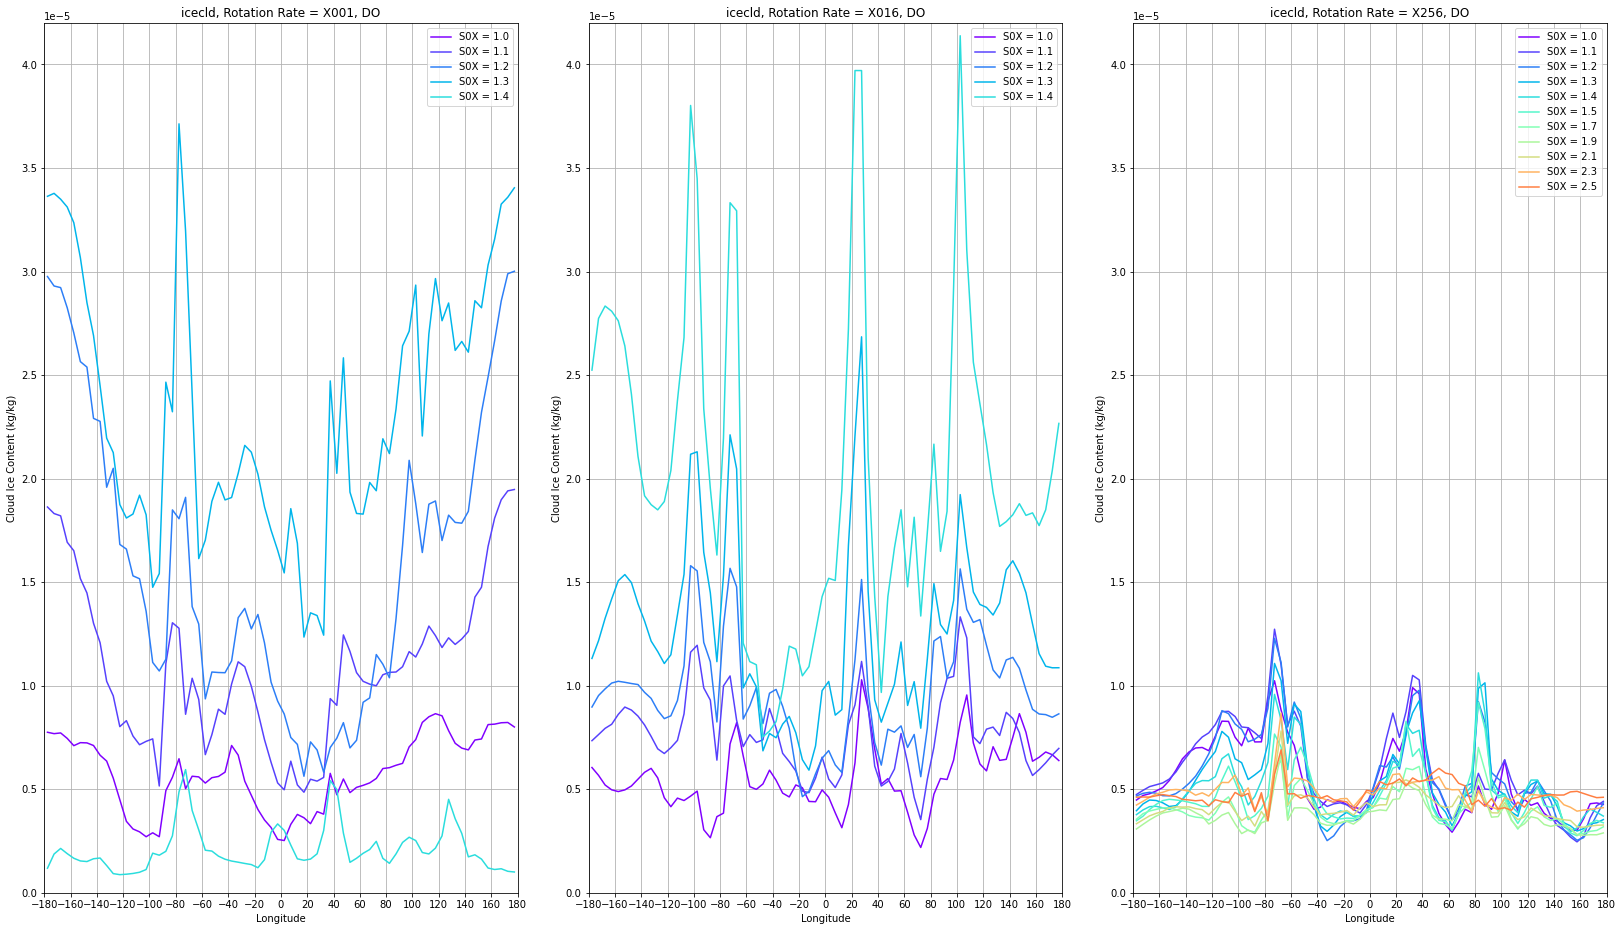

In [15]:
directory = 'AIJL'
rotation = ['X001','X016', 'X256']
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'icecld'

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(1, 3)
gs.update(hspace=.25, wspace=.15)
ax = []

for i, rate in enumerate(rotation):
    files = [os.path.basename(file) for file in glob.glob(directory+'/*'+rate+'*.nc')]
    files = sorted(files, key=sorter)
    if not files:
        print('Error: No files found for rotaion rate: ' + rate)
        ax.append(plt.subplot(gs[i]))
        continue
    else:
        pass
    name = files[0]
    data = Dataset(path + name,'r') # loading this to automatically population plot titles

    ax.append(plt.subplot(gs[i]))
    ax[i].set_title(var + ', Rotation Rate = ' + rate +', DO')
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel(data[var].long_name+' ('+data[var].units+')')
    ax[i].set_ylim(0,4.2*(10**-5))
    ax[i].set_xlim(-180,180)
    ax[i].set_xticks(np.arange(-180,200,20))
    plt.grid()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(insolation)))
    for j in range(len(files)):
        var1, lon = open_zonal_line_ROCKE3D(path, files[j], directory, var)
    #     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
        plt.plot(lon, var1, label='S0X = '+ str(insolation[j]),color=colors[j])
    
    plt.legend()

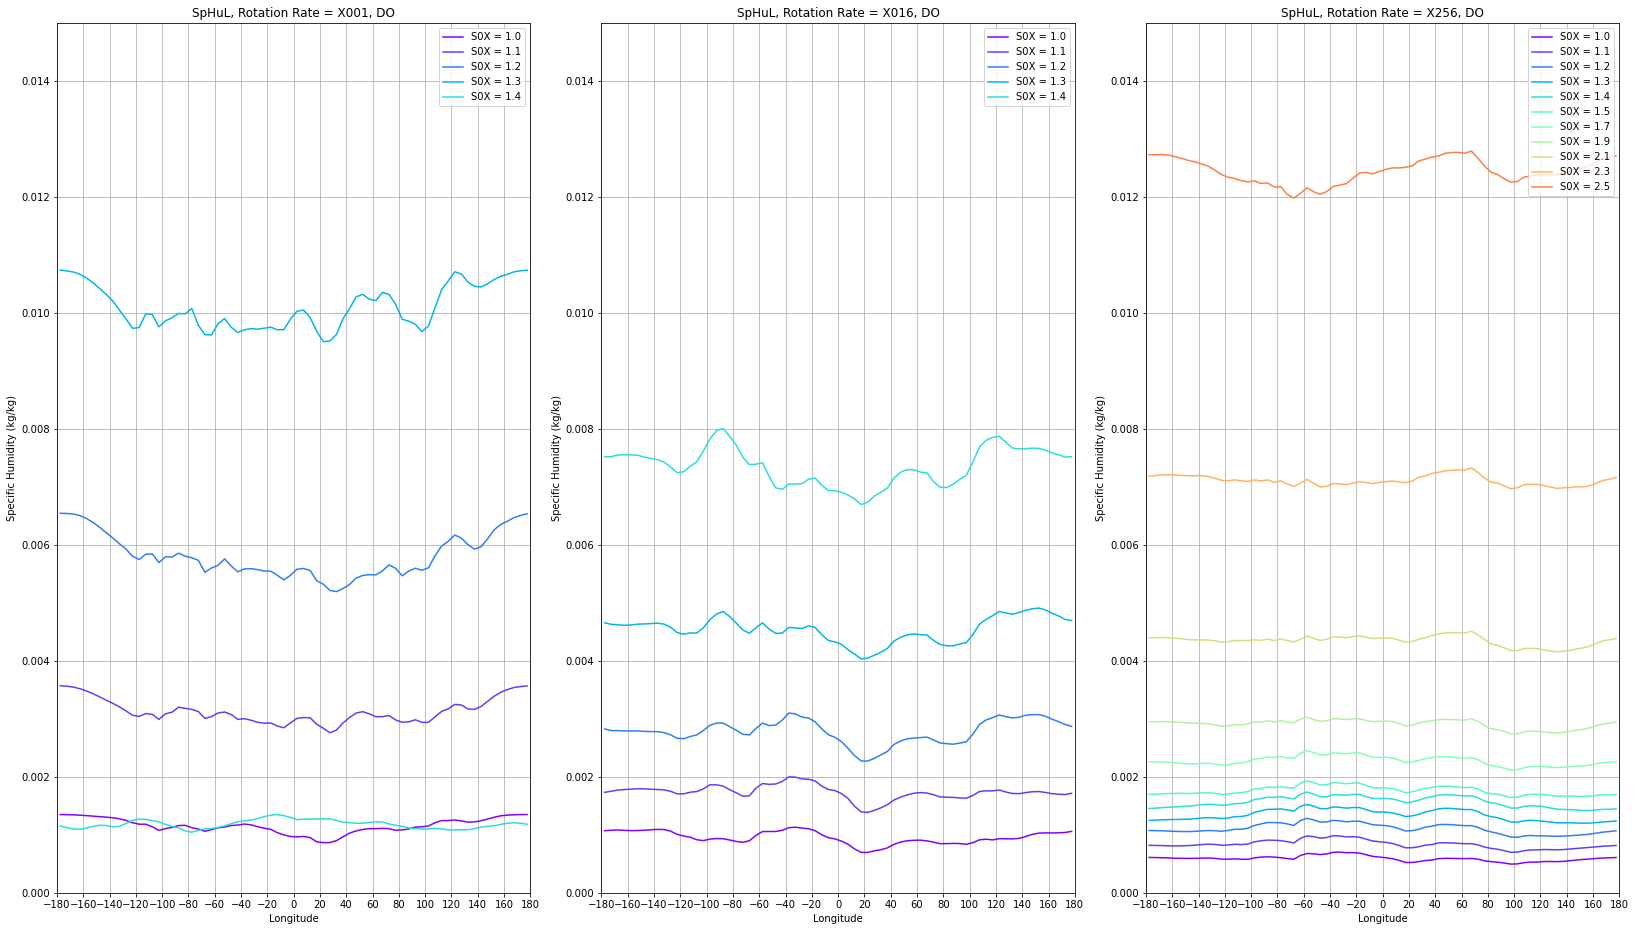

In [16]:
directory = 'AIJL'
rotation = ['X001','X016', 'X256']
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var = 'SpHuL'


fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(1, 3)
gs.update(hspace=.25, wspace=.15)
ax = []

for i, rate in enumerate(rotation):
    files = [os.path.basename(file) for file in glob.glob(directory+'/*'+rate+'*.nc')]
    files = sorted(files, key=sorter)
    if not files:
        print('Error: No files found for rotaion rate: ' + rate)
        ax.append(plt.subplot(gs[i]))
        continue
    else:
        pass
    name = files[0]
    data = Dataset(path + name,'r') # loading this to automatically population plot titles

    ax.append(plt.subplot(gs[i]))
    ax[i].set_title(var + ', Rotation Rate = ' + rate +', DO')
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel(data[var].long_name+' ('+data[var].units+')')
    ax[i].set_ylim(0,0.015)
    ax[i].set_xlim(-180,180)
    ax[i].set_xticks(np.arange(-180,200,20))
    plt.grid()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(insolation)))
    for j in range(len(files)):
        var1, lon = open_zonal_line_ROCKE3D(path, files[j], directory, var)
    #     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
        plt.plot(lon, var1, label='S0X = '+ str(insolation[j]),color=colors[j])
    
    plt.legend()